## Horizontal Projection
หา row

Lines detected: [(32, 51), (91, 138), (156, 182), (201, 227), (249, 274), (295, 325), (339, 372), (390, 418), (438, 710), (731, 2197), (2215, 2240), (2257, 2281)]


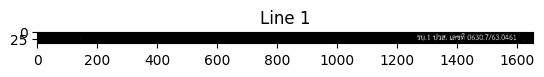

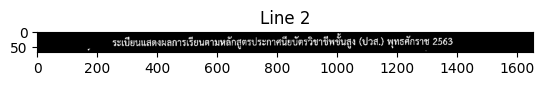

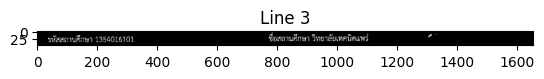

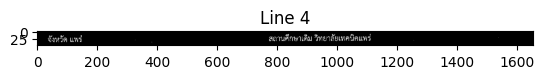

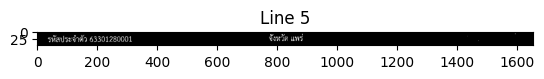

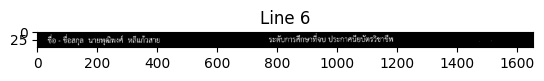

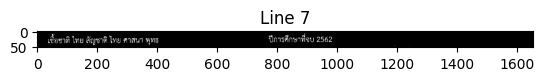

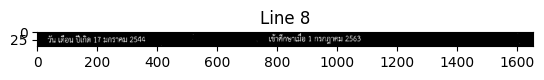

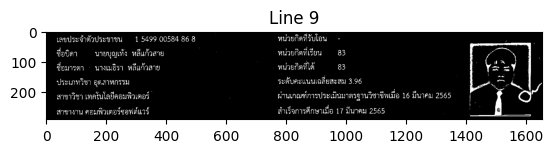

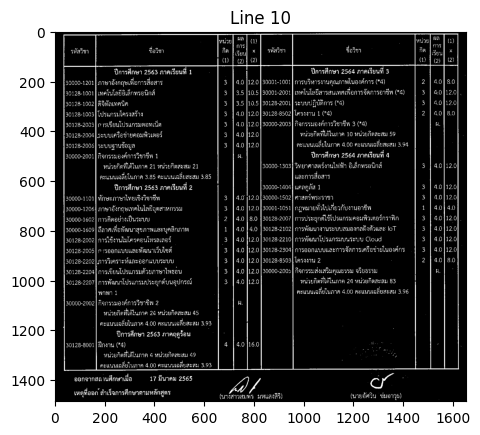

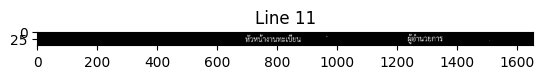

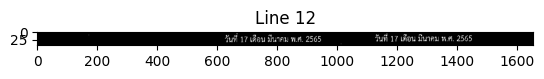

Saved lines to ..\..\data\output_images\output_lines


In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

output_folder = Path("../../data/output_images/output_lines")
output_folder.mkdir(exist_ok=True)

# โหลดภาพ
#image = cv2.imread("../data/test_images/line_detection/test_a_to_z_3.jpg")
#image = cv2.imread("../data/test_images/line_detection/testAtoZ_1.jpg")
#image = cv2.imread("../data/test_images/line_detection/0to9_2.jpg")
image = cv2.imread("../../data/test_images/transcript/aun_20240817_0001.jpg")
if image is None:
    raise FileNotFoundError("ไม่พบไฟล์ภาพ กรุณาตรวจสอบเส้นทางของไฟล์")

# แปลงเป็น Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

'''
# แปลงเป็น Binary
_, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)  # Threshold ขาวดำ
'''

# การ Threshold แบบ Adaptive Gaussian
binary_image = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,30
)

# คำนวณ Histogram Projection
horizontal_projection = np.sum(binary_image, axis=1)  # รวมพิกเซลในแนวนอน

threshold_value = 2000  # เพิ่มค่าให้เหมาะกับความหนาของตัวอักษร
line_indices = np.where(horizontal_projection > threshold_value)[0]

# แยกช่วงตำแหน่งแต่ละบรรทัด
lines = []
start_idx = None

for i in range(len(line_indices) - 1):
    if start_idx is None:
        start_idx = line_indices[i]
    if line_indices[i+1] > line_indices[i] + 10:  # เจอช่วงว่างระหว่างบรรทัด
        end_idx = line_indices[i]
        lines.append((start_idx, end_idx))
        start_idx = None
if start_idx is not None:
    lines.append((start_idx, line_indices[-1]))

print("Lines detected:", lines)

# แยกบรรทัดและเพิ่ม Padding
line_images = []
padding = 10  # ระบุ Padding

for start, end in lines:
    padded_start = max(0, start - padding)
    padded_end = min(binary_image.shape[0], end + padding)
    line_img = binary_image[padded_start:padded_end, :]
    line_images.append(line_img)

for idx, line_img in enumerate(line_images):
    file_path = output_folder / f"line_{idx + 1}.png"
    cv2.imwrite(str(file_path), line_img)
    plt.figure()
    plt.imshow(line_img, cmap="gray")
    plt.title(f"Line {idx + 1}")
    plt.show()
print(f"Saved lines to {output_folder}")


## Vertical Projection
หา column

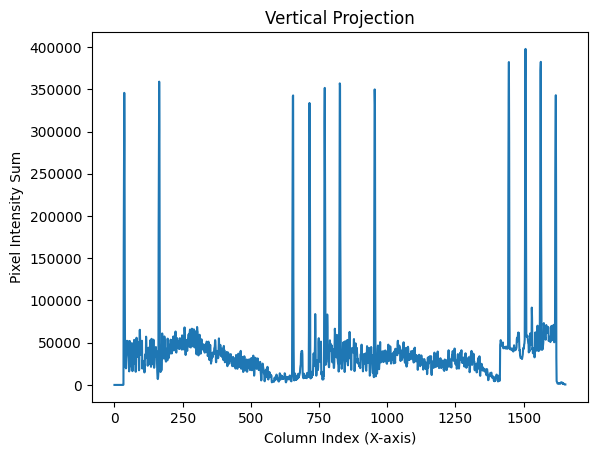

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# โหลดภาพและแปลงเป็น Grayscale
image = cv2.imread("../../data/test_images/transcript/aun_20240817_0001.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold ภาพให้เป็น Binary
_, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# คำนวณ Vertical Projection
vertical_projection = np.sum(binary_image, axis=1)

# หาตำแหน่งที่มีข้อความในแนวตั้ง
column_indices = np.where(vertical_projection > 0)[0]

# วาดกราฟแสดง Vertical Projection
plt.plot(vertical_projection)
plt.title("Vertical Projection")
plt.xlabel("Column Index (X-axis)")
plt.ylabel("Pixel Intensity Sum")
plt.show()

columns = []
start_idx = None

for i in range(len(column_indices) - 1):
    if start_idx is None:
        start_idx = column_indices[i]
    if column_indices[i + 1] > column_indices[i] + 1:  # เจอช่องว่างระหว่างคอลัมน์
        end_idx = column_indices[i]
        columns.append((start_idx, end_idx))
        start_idx = None
if start_idx is not None:
    columns.append((start_idx, column_indices[-1]))

# ตัดภาพคอลัมน์แต่ละส่วน
column_images = [binary_image[:, start:end] for start, end in columns]


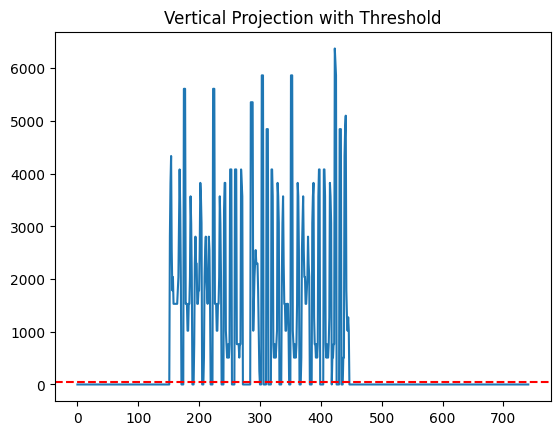

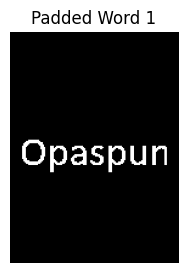

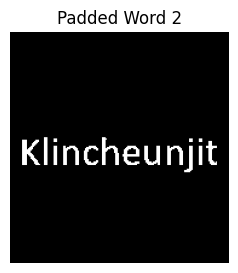

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ตัวอย่าง Line Image (สมมติว่าเป็นภาพของบรรทัดที่จับได้แล้ว)

image = cv2.imread("../../data/test_images/column_detection/col_test_2.jpg")
if image is None:
    raise FileNotFoundError("ไม่พบไฟล์ภาพ กรุณาตรวจสอบเส้นทางของไฟล์")

# แปลงเป็น Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

'''
# แปลงเป็น Binary
_, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)  # Threshold ขาวดำ
'''

# การ Threshold แบบ Adaptive Gaussian
binary_image = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,30
)

# คำนวณ Vertical Histogram Projection
vertical_projection = np.sum(binary_image, axis=0)

# หาตำแหน่งที่มีคำหรือประโยค (พื้นที่ที่มีพิกเซล)
threshold_value = 50
word_indices = np.where(vertical_projection > threshold_value)[0]

# Plot Vertical Projection
# เพื่อช่วยวิเคราะห์ว่าการตั้งค่า Threshold ถูกต้องหรือไม่ 
plt.plot(vertical_projection)
plt.axhline(y=threshold_value, color='r', linestyle='--')  # เส้น Threshold
plt.title("Vertical Projection with Threshold")
plt.show()


# แยกช่วงตำแหน่งคำหรือประโยค
words = []
start_idx = None

for i in range(len(word_indices) - 1):
    if start_idx is None:
        start_idx = word_indices[i]
    if word_indices[i+1] > word_indices[i] + 10:  # เจอช่องว่างระหว่างคำ
        end_idx = word_indices[i]
        words.append((start_idx, end_idx))
        start_idx = None
if start_idx is not None:
    words.append((start_idx, word_indices[-1]))

# แยกคำหรือประโยคและเพิ่ม Padding
word_images = []
padding_top = 5    # กำหนด Padding ด้านบน
padding_bottom = 5 # กำหนด Padding ด้านล่าง
padding_left = 10  # กำหนด Padding ด้านซ้าย
padding_right = 10 # กำหนด Padding ด้านขวา

for start, end in words:
    # ตัดเฉพาะช่วงของคำ
    word_img = binary_image[:, start:end]  
    
    # เพิ่ม Padding รอบภาพ
    padded_word_img = cv2.copyMakeBorder(
        word_img, 
        padding_top, padding_bottom, padding_left, padding_right, 
        cv2.BORDER_CONSTANT, value=0  # เติมสีดำ (0) สำหรับ Binary Image
    )
    word_images.append(padded_word_img)

# แสดงคำที่แยกได้พร้อม Padding
for idx, padded_word_img in enumerate(word_images):
    plt.figure(figsize=(3, 3))
    plt.imshow(padded_word_img, cmap="gray")
    plt.title(f"Padded Word {idx + 1}")
    plt.axis("off")
    plt.show()


### 